# Built-In Functions

```scipy.special``` contains a number of built in functions that may be useful for different applications. A summary of these can be found [here](https://docs.scipy.org/doc/scipy/reference/special.html). There are a few reasons you might choose to use the SciPy versions:
* You don't have to spend time writing it yourself
* The SciPy version will be well-tested and robust
* The Scipy version will work element-wise on arrays of data 
* The SciPy version will be faster to run than what you could write yourself, particularly when operating on arrays of values

Many of the functions in ```scipy.special``` may be applied element-wise to NumPy arrays.

There is a lot of variation in the functions available in ```scipy.special```  and it's impossible to cover them all. Instead, this notebook runs through some examples that may be useful in themselves, but also aims to demonstrate the types of functions and interfaces which are available.



## Permutations

The permutation function determines the number of different ways $k$ things can be taken from a pool of $n$ things. This is a common function in statistics and has the functional form:

$P = \frac{n!}{(n-k)!}$

```scipy.special.perm``` [provides a way for calculating this value in SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html#scipy.special.perm). The first argument is the value of $n$ and the second is the value of $k$.

In [1]:
from scipy.special import perm

print("n=3, k=2: ", perm(3, 2))
print("n=100, k=10: ", perm(100, 10))


n=3, k=2:  6.0
n=100, k=10:  6.281565095552947e+19


## Error Function

The error function ($erf$) is used to calculate probabilities drawn from a Normal distribution and is defined as:

$erf(z) = \frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-t^{2}}\textrm{d}t$

```scipy.special.erf``` [contains an way to evalaute these functions using SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html). The only argument is the value for which the error function is to be evaluated.



In [2]:
from scipy.special import erf

print(erf(1))


0.8427007929497148


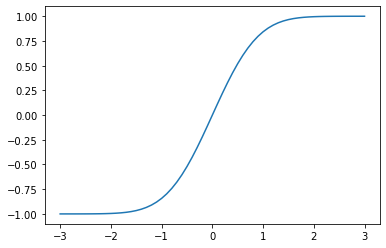

In [3]:
# This example plots the values of erf as a function of x
# If you're not familiar with matplotlib, don't worry about that aspect of the code

import matplotlib.pyplot as plt
from scipy.special import erf
import numpy as np

x = np.arange(-3, 3.001, 0.1)
# We can calcualte a NumPy array of results because erf acts element-wise on x
y = erf(x)

plt.plot(x, y)


## Spherical Harmonics

[Spherical functions](https://en.wikipedia.org/wiki/Spherical_harmonics) are a type of function defined on a surface of a sphere that occur in the solution of partial differential equations in many scientific fields, including electric fields, quantum mechanics, geoids and gravitational fields. There are multiple different spherical harmonic functions of different "order" and "degree". The magnitude of the order of the function must be less than or equal to the degree of the function and the degree of the function must be zero or greater.

```scipy.special.sph_harm``` [contains an way to evalaute these functions using SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html#scipy.special.sph_harm). The first value is the order of the spherical harmonic, the second is its degree and the third and fourth are the azimuthal and polar coordinates respectively at which the spherical harmonic is to be evaluated. The function will accept complex values and may give complex answers.

In [4]:
from scipy.special import sph_harm

print(sph_harm(1, 3, 0, 1))


(-0.12499567468295585+0j)


/tmp/ipykernel_3809/2092687012.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  sph[i_p, i_a] = sph_harm(2,4, azimuthal[i_a], polar[i_p])


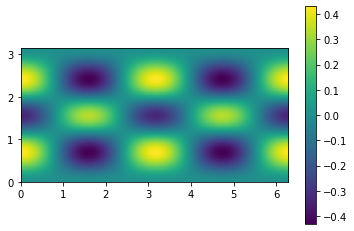

In [5]:
# This example plots the values of sph_harm as a function of x and y
# If you're not familiar with matplotlib, don't worry about that aspect of the code

from scipy.special import sph_harm
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.cm as cmap
from matplotlib.pyplot import xlim
import math

azimuthal = np.arange(0, 2 * math.pi, math.pi / 100)
polar = np.arange(0, math.pi, math.pi / 100)

sph = np.zeros([100, 200])

for i_a in range(200):
    for i_p in range(100):
        sph[i_p, i_a] = sph_harm(2, 4, azimuthal[i_a], polar[i_p])

mpl.imshow(sph, extent=(0, 2 * math.pi, 0, math.pi))
mpl.colorbar()


## Exercise

Look through the [list of built-in functions](https://docs.scipy.org/doc/scipy/reference/special.html) in ```scipy.special```. Find one or two functions that are relevant to your research (or, at least, that you've heard of before) and have a go at using them in the cell below.

In [8]:
import numpy as np
from scipy.special import gammainc

a = 10
x = np.arange(0, 11, 1)

gammainc(a, x)


array([0.00000000e+00, 1.11425478e-07, 4.64980750e-05, 1.10248813e-03,
       8.13224280e-03, 3.18280573e-02, 8.39240170e-02, 1.69504063e-01,
       2.83375741e-01, 4.12591756e-01, 5.42070286e-01])

In [23]:
import numpy as np
from scipy.special import entr, rel_entr, kl_div

x = np.random.random(5)
y = np.random.random(5)

print(entr(x))
print(rel_entr(x, y))
print(kl_div(x, y))


[0.36358295 0.36090602 0.36097025 0.06272861 0.33098857]
[-0.34443844 -0.09166273  0.97621686  0.27501919  0.02612653]
[0.2831433  0.01562549 0.58312983 0.03675217 0.00061689]
